## "Descrete Regression"

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def noi(x):
    return x + 0.5 * np.random.randn()

In [3]:
def f(x):
    if x < 0.2:
        return 0.4
    elif x < 0.3:
        return 0.2
    elif x < 0.4:
        return 0.9
    elif x < 0.5:
        return 0.8
    elif x < 0.8:
        return 0.5
    return 0.3

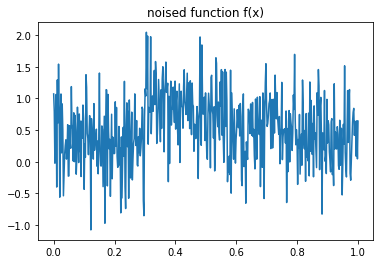

In [4]:
x = np.linspace(0, 1, 500)
plt.plot(x, map(noi, map(f,x)))
plt.title('noised function f(x)')
plt.show()

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.affine1 = nn.Linear(1, 512)
        self.affine2 = nn.Linear(512, 1)
    
    def forward(self, x):
        x = F.relu(self.affine1(x))
        return self.affine2(x)


class TonyNN(torch.nn.Module):
    def __init__(self):
        super(TonyNN, self).__init__()
        self.affine1 = nn.Linear(1, 512)
        self.gates = nn.Linear(1, 512)
        self.affine2 = nn.Linear(512, 1)
    
    def forward(self, x):
        g = F.sigmoid(self.gates(x)*5e2)
        x = F.relu(self.affine1(x))
        return self.affine2(x * g)

In [49]:
model = NN()
model.train()
tonymodel = TonyNN()
tonymodel.train()
optimizerNN = optim.Adam(model.parameters(), lr=5e-3)
optimizerTony = optim.Adam(tonymodel.parameters(), lr=5e-3)

for i in xrange(3000):
    x = torch.rand(512,1)
    y = Variable(torch.Tensor(map(noi, map(f, x.squeeze()))))
    y_NN = model(Variable(x))
    y_Tony = tonymodel(Variable(x))

    optimizerNN.zero_grad()
    optimizerTony.zero_grad()
    output_NN = torch.sum((y_NN.squeeze() - y).pow(2)) / 256.0
    output_Tony = torch.sum((y_Tony.squeeze() - y).pow(2)) / 256.0
    output_NN.backward()
    output_Tony.backward()
    if i == 2999:
        print "NN", output_NN.data[0]
        print "Tony", output_Tony.data[0]
    optimizerNN.step()
    optimizerTony.step()    

NN 0.50734102726
Tony 0.4960719347


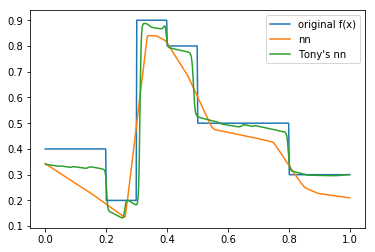

In [50]:
model.eval()

tonymodel.eval()
x = np.linspace(0, 1, 500)
plt.plot(x, map(f,x))
plt.plot(x, model(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy())
plt.plot(x, tonymodel(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy())
plt.legend(['original f(x)', 'nn', "Tony's nn"])
plt.show()

It's amazing on fitting piecewise functions!   
How about fitting continuous functions?

In [44]:
def g(x):
    return x*x*x-x*x+1

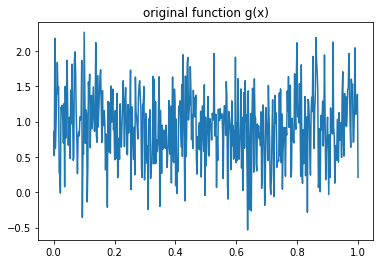

In [45]:
x = np.linspace(0, 1, 500)
plt.plot(x, map(noi, map(g,x)))
plt.title('original function g(x)')
plt.show()

In [46]:
model = NN()
tonymodel = TonyNN()
model.train()
tonymodel.train()
optimizerNN = optim.Adam(model.parameters(), lr=5e-3)
optimizerTony = optim.Adam(tonymodel.parameters(), lr=5e-3)

for i in xrange(3000):
    x = torch.rand(256,1)
    y = Variable(torch.Tensor(map(noi, map(g, x.squeeze()))))
    y_NN = model(Variable(x))
    y_Tony = tonymodel(Variable(x))

    optimizerNN.zero_grad()
    optimizerTony.zero_grad()
    output_NN = torch.sum((y_NN.squeeze() - y).pow(2)) / 256.0
    output_Tony = torch.sum((y_Tony.squeeze() - y).pow(2)) / 256.0
    output_NN.backward()
    output_Tony.backward()
    if i == 2999:
        print "NN", output_NN.data[0]
        print "Tony", output_Tony.data[0]
    optimizerNN.step()
    optimizerTony.step()    

NN 0.243085816503
Tony 0.243546292186


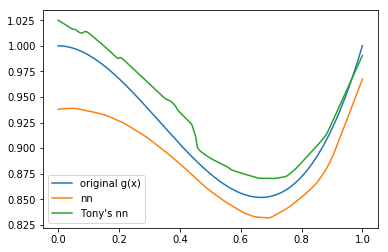

In [47]:
model.eval()
tonymodel.eval()
x = np.linspace(0, 1, 500)
plt.plot(x, map(g,x))
plt.plot(x, model(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy())
plt.plot(x, tonymodel(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy())
plt.legend(['original g(x)', 'nn', "Tony's nn"])
plt.show()

Not bad!

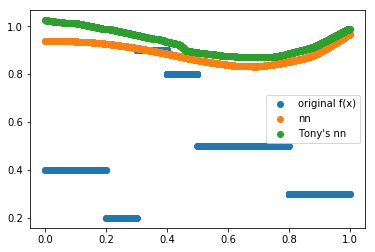

In [48]:
# Test Sample
x = np.random.rand(3000)
plt.plot(x, map(f,x), 'o')
plt.plot(x, model(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy(), 'o')
plt.plot(x, tonymodel(Variable(torch.Tensor(x).unsqueeze(1))).data.numpy(), 'o')
plt.legend(['original f(x)', 'nn', "Tony's nn"])
plt.show()